# Trabalho Final de SGBD

Importando os recursos necessários.

In [257]:
import pandas as pd
import numpy as np

Lendo o arquivo CSS.

In [258]:
# Lendo.
df = pd.read_csv('forestfires.csv')
# Removendo colunas que não serão analisadas (coordenadas X e Y).
df = df.drop(columns = ['X', 'Y'])

In [259]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   month   517 non-null    object 
 1   day     517 non-null    object 
 2   FFMC    517 non-null    float64
 3   DMC     517 non-null    float64
 4   DC      517 non-null    float64
 5   ISI     517 non-null    float64
 6   temp    517 non-null    float64
 7   RH      517 non-null    int64  
 8   wind    517 non-null    float64
 9   rain    517 non-null    float64
 10  area    517 non-null    float64
dtypes: float64(8), int64(1), object(2)
memory usage: 44.6+ KB


### Etapa de pré-processamento

In [260]:
from sklearn.model_selection import train_test_split

# Separando os conjuntos de dados de treino e teste.
df_treino, df_teste = train_test_split(df, test_size = 0.2, random_state = 42)

# Separando a coluna alvo do conjunto de treino.
df_treino_labels = df_treino['month'].copy()
df_treino = df_treino.drop(columns = 'month')

# Separando a coluna alvo do conjunto de teste.
df_teste_labels = df_teste['month'].copy()
df_teste = df_teste.drop(columns = 'month')

In [261]:
# Imports necessários para o pré-processamento.
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [262]:
# Classificando os atributos como numéricos ou categóricos.
nomes_atributos_numericos = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']
nomes_atributos_categoricos = ['day']

In [263]:
# Lidando com dados ausentes.
pipeline_atr_numericos = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
])

preproc_completo = ColumnTransformer([
    ('numericos', pipeline_atr_numericos, nomes_atributos_numericos),
    ('categoricos', OneHotEncoder(handle_unknown = 'ignore'), nomes_atributos_categoricos),
], sparse_threshold = 0)

In [264]:
# Pré-processamento do conjunto de treino.
X_treino = preproc_completo.fit_transform(df_treino)

# Pré-processamento do conjunto de teste.
X_teste = preproc_completo.transform(df_teste)

# Coluna alvo para os conjuntos de treino e teste.
y_treino = df_treino_labels.values
y_teste = df_teste_labels.values

In [265]:
y_teste

array(['may', 'aug', 'aug', 'sep', 'aug', 'mar', 'mar', 'aug', 'sep',
       'aug', 'aug', 'sep', 'jul', 'aug', 'sep', 'sep', 'aug', 'sep',
       'aug', 'aug', 'mar', 'sep', 'dec', 'sep', 'sep', 'aug', 'feb',
       'aug', 'sep', 'sep', 'aug', 'sep', 'sep', 'sep', 'mar', 'jun',
       'aug', 'sep', 'aug', 'aug', 'aug', 'sep', 'aug', 'sep', 'aug',
       'jun', 'mar', 'apr', 'sep', 'jul', 'aug', 'sep', 'aug', 'aug',
       'aug', 'mar', 'oct', 'jul', 'sep', 'sep', 'aug', 'aug', 'aug',
       'aug', 'aug', 'sep', 'sep', 'aug', 'aug', 'mar', 'sep', 'sep',
       'jun', 'jan', 'jun', 'aug', 'aug', 'aug', 'aug', 'mar', 'apr',
       'sep', 'aug', 'mar', 'mar', 'feb', 'sep', 'sep', 'dec', 'sep',
       'aug', 'mar', 'oct', 'aug', 'aug', 'aug', 'mar', 'aug', 'aug',
       'aug', 'dec', 'aug', 'aug', 'sep'], dtype=object)

## Regressão Lógica

In [266]:
# Importando a regressão lógica.
from sklearn.linear_model import LogisticRegression

# Instanciando o objeto regressão lógica.
log_reg = LogisticRegression(max_iter = 300)

log_reg.fit(X_treino, y_treino)
log_reg.classes_

array(['apr', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may',
       'nov', 'oct', 'sep'], dtype=object)

### Probabilidade Estimada

In [ ]:
y_probabilidade_reglog = log_reg.predict_proba(X_teste)
np.round(y_probabilidade_reglog, decimals = 2)

### Previsões

In [ ]:
y_previsto_reglog = log_reg.predict(X_teste)
y_previsto_reglog

### Acurácia

In [ ]:
y_teste, y_teste.shape

## Árvores de Decisão

In [267]:
# Importa a árvore de decisão.
from sklearn.tree import DecisionTreeClassifier

# Instanciando o objeto árvore de decisão.
arvore = DecisionTreeClassifier(max_depth = 2)

arvore.fit(X_treino, y_treino)
arvore.classes_

array(['apr', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may',
       'nov', 'oct', 'sep'], dtype=object)

### Probabilidade Estimada

In [268]:
# Probabilidade estimada pela árvore de decisão.
y_probabilidade_arvore = arvore.predict_proba(X_teste)
np.round(y_probabilidade_arvore, decimals = 2)

array([[0.06, 0.03, 0.05, ..., 0.01, 0.  , 0.  ],
       [0.  , 0.79, 0.  , ..., 0.  , 0.  , 0.2 ],
       [0.  , 0.79, 0.  , ..., 0.  , 0.  , 0.2 ],
       ...,
       [0.  , 0.79, 0.  , ..., 0.  , 0.  , 0.2 ],
       [0.  , 0.92, 0.  , ..., 0.  , 0.02, 0.01],
       [0.  , 0.01, 0.  , ..., 0.  , 0.08, 0.92]])

### Previsões

In [269]:
# Previsões da árvore de decisão.
y_previsto_arvore = arvore.predict(X_teste)
y_previsto_arvore

array(['mar', 'aug', 'aug', 'sep', 'sep', 'mar', 'mar', 'aug', 'sep',
       'aug', 'aug', 'sep', 'mar', 'aug', 'sep', 'sep', 'aug', 'sep',
       'aug', 'aug', 'mar', 'sep', 'mar', 'sep', 'sep', 'aug', 'mar',
       'aug', 'sep', 'sep', 'aug', 'sep', 'sep', 'sep', 'mar', 'mar',
       'aug', 'sep', 'aug', 'aug', 'aug', 'sep', 'aug', 'sep', 'aug',
       'mar', 'mar', 'mar', 'sep', 'mar', 'aug', 'sep', 'aug', 'aug',
       'sep', 'mar', 'sep', 'mar', 'sep', 'sep', 'aug', 'aug', 'aug',
       'aug', 'aug', 'sep', 'sep', 'aug', 'aug', 'mar', 'sep', 'sep',
       'mar', 'mar', 'mar', 'aug', 'aug', 'aug', 'aug', 'mar', 'mar',
       'sep', 'aug', 'mar', 'mar', 'mar', 'sep', 'sep', 'mar', 'sep',
       'aug', 'mar', 'sep', 'aug', 'aug', 'aug', 'mar', 'aug', 'aug',
       'aug', 'mar', 'aug', 'aug', 'sep'], dtype=object)

### Acurácia

In [270]:
from sklearn.metrics import accuracy_score

# Acurácia.
print("Acurácia: ", accuracy_score(y_teste,y_previsto_arvore))

Acurácia:  0.8076923076923077


### Visualização

[Text(669.6, 543.6, 'DC <= 0.472\ngini = 0.747\nsamples = 100.0%\nvalue = [0.017, 0.339, 0.015, 0.044, 0.002, 0.07, 0.031, 0.102\n0.002, 0.002, 0.031, 0.344]\nclass = sep'),
 Text(334.8, 326.16, 'DC <= -0.289\ngini = 0.737\nsamples = 52.1%\nvalue = [0.033, 0.442, 0.028, 0.084, 0.005, 0.13, 0.06, 0.195\n0.005, 0.005, 0.009, 0.005]\nclass = aug'),
 Text(167.4, 108.72000000000003, 'gini = 0.782\nsamples = 27.8%\nvalue = [0.061, 0.026, 0.052, 0.157, 0.009, 0.2, 0.113, 0.365\n0.009, 0.009, 0.0, 0.0]\nclass = mar'),
 Text(502.20000000000005, 108.72000000000003, 'gini = 0.151\nsamples = 24.2%\nvalue = [0.0, 0.92, 0.0, 0.0, 0.0, 0.05, 0.0, 0.0, 0.0, 0.0\n0.02, 0.01]\nclass = aug'),
 Text(1004.4000000000001, 326.16, 'DMC <= 0.67\ngini = 0.438\nsamples = 47.9%\nvalue = [0.0, 0.227, 0.0, 0.0, 0.0, 0.005, 0.0, 0.0, 0.0, 0.0\n0.056, 0.712]\nclass = sep'),
 Text(837.0, 108.72000000000003, 'gini = 0.156\nsamples = 34.4%\nvalue = [0.0, 0.007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0\n0.077, 0.915]\nclas

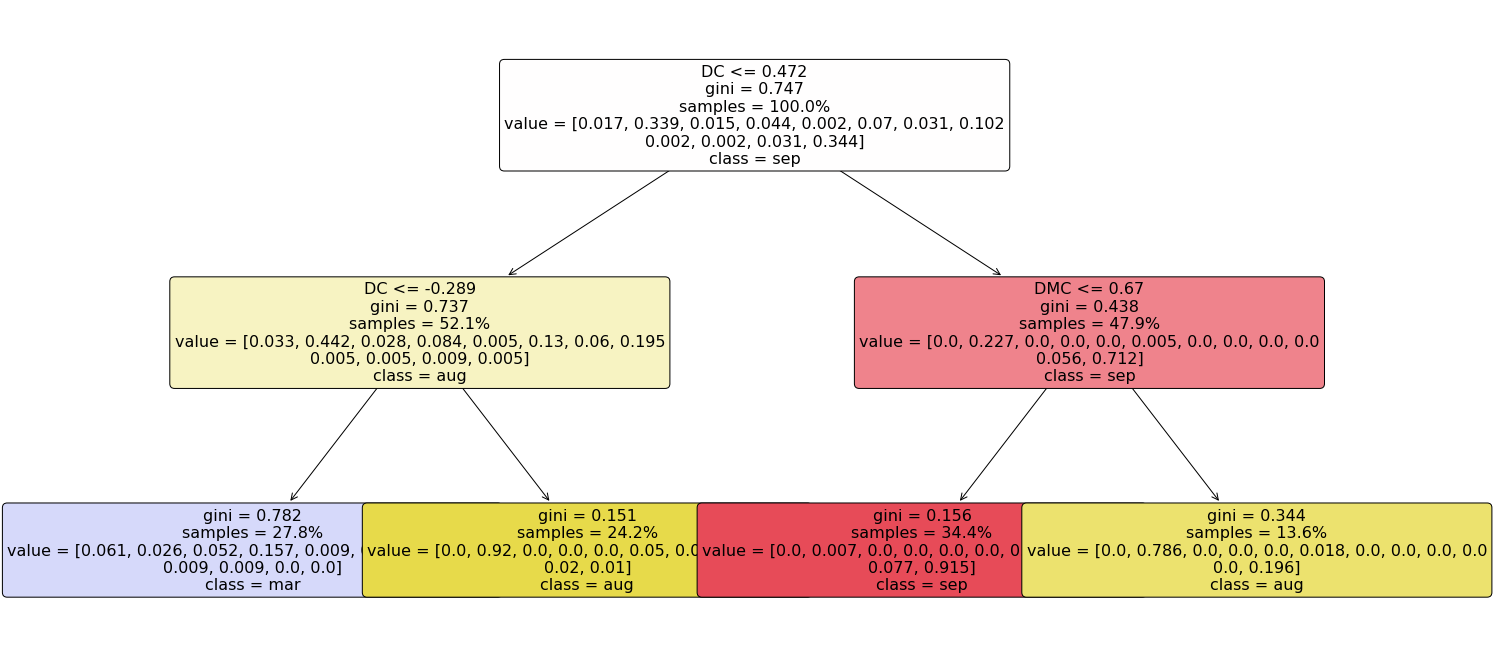

In [271]:
# Importando bibliotecas necessárias.
import matplotlib.pyplot as plt
from sklearn import tree

# Obtendo os nomes dos atributos.
nomes_atributos = np.append(nomes_atributos_numericos, preproc_completo.named_transformers_['categoricos'].get_feature_names())

plt.figure(figsize = (24, 12))

# Plotando a árvore.
tree.plot_tree(arvore,
               feature_names = nomes_atributos,
               class_names = arvore.classes_,
               rounded = True,
               filled = True,
               proportion = True,
               fontsize = 16)